# HRDIC data analysis example

This notebook shows an example of how the HRDIC module can be used to analyse HRDIC data. First we need to import some modules, including the HRDIC analysis module.

In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import HRDIC_analysis as hrdic
%matplotlib inline

## 1. Read the data in

The data is in the data directory: '../data/':

In [2]:
ls '../data'

AZ31GrainBreakup.txt  p3-3.TXT              p7-1.TXT
gbs.tiff              p4-1.TXT              p7-2.TXT
p1-1.TXT              p4-2.TXT              p7-3.TXT
p1-2.TXT              p4-3.TXT              p8-1.TXT
p1-3.TXT              p5-1.TXT              p8-2.TXT
p2-1.TXT              p5-2.TXT              p8-3.TXT
p2-2.TXT              p5-3.TXT              p9-1.TXT
p2-3.TXT              p6-1.TXT              p9-2.TXT
p3-1.TXT              p6-2.TXT              p9-3.TXT
p3-2.TXT              p6-3.TXT


Lets look at 'p3-1.TXT':

In [3]:
def_map=hrdic.DeformationMap('../data/','p3-1.TXT')

## 2. Display the data
We can now plot any component we like. For example, max_shear:

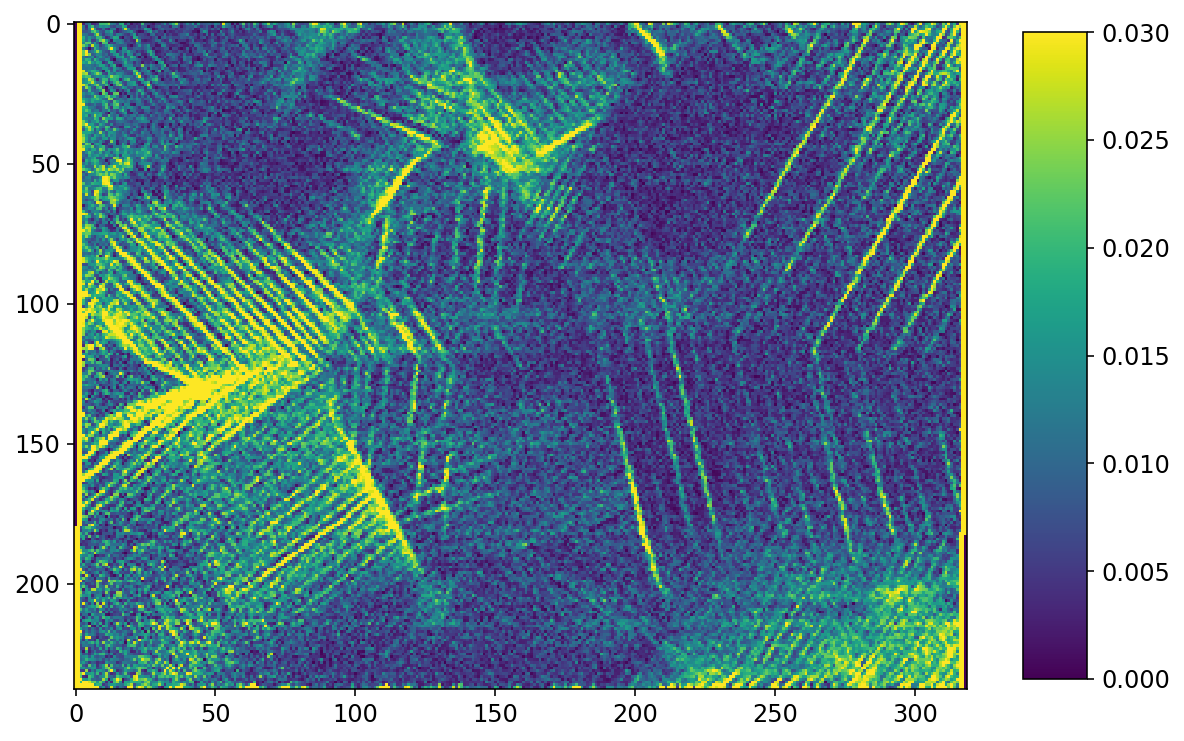

In [4]:
f,ax=plt.subplots(1,1,figsize=(10,7))
shear_map=ax.imshow(def_map.max_shear,cmap='viridis',vmax=0.03)
plt.colorbar(shear_map,ax=ax,shrink=0.85,aspect=10);

Or even rotation. For example, the antisymmetric part of the deformation matrix is given by:

$$\omega=\dfrac{F_{12} - F_{21}}{2}$$

so:

In [12]:
omega=(def_map.f12-def_map.f21)/2

To plot $\omega$, which has positive and negative values, I will use the seismic colourmap:

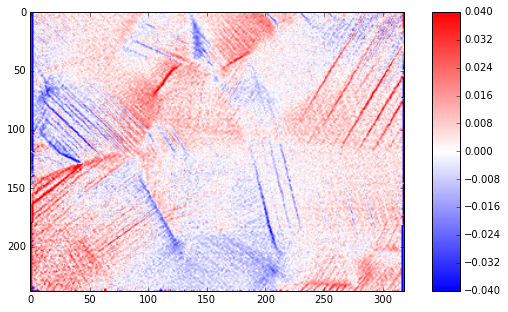

In [13]:
f,ax=plt.subplots(1,1,figsize=(10,5))
shear_map=ax.imshow(omega,cmap='bwr',vmin=-0.04,vmax=0.04)
plt.colorbar(shear_map,ax=ax,aspect=10);

## 3. Data analysis

We can also plot autocorrelation functions for any map:

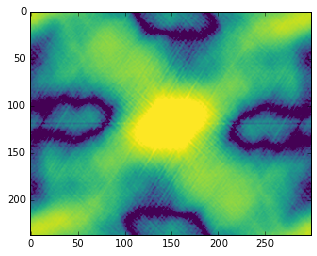

In [14]:
two_point_map=hrdic.acorr_map(omega[:,10:-10],c_range=[-3,0.1])

We can also easily get a histogram:

In [15]:
omega_hist=hrdic.def_hist(omega,values_range=(-0.03,0.03))

and plot the distributions:

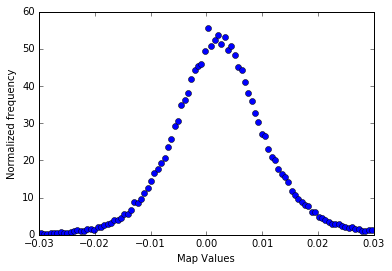

In [16]:
hrdic.plot_hist_line(omega_hist)

Say now we'd like to measure the alignement of the band-like features in the rotation map. We can use the `sb_angle` function to do this:

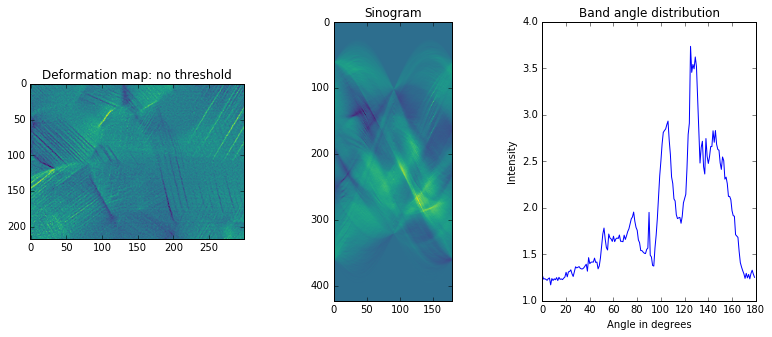

In [17]:
omega_angle_profile=hrdic.sb_angle(omega[10:-10,10:-10]) #the indexing at the end removes a border of 10x10 pixels

In this case, the $\omega$ map is not very revealing. Let's try the shear strain map:

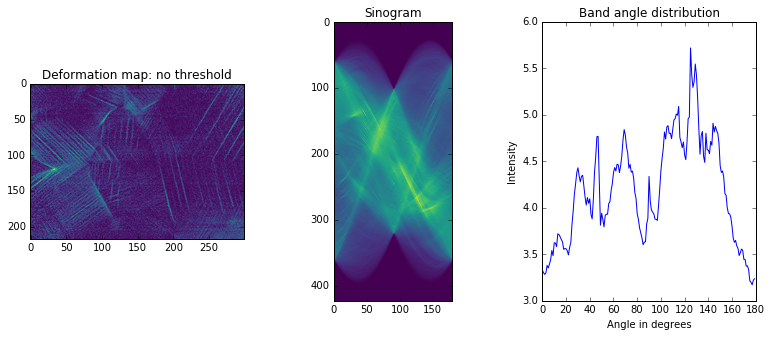

In [18]:
max_shear_angle_profile=hrdic.sb_angle(def_map.max_shear[10:-10,10:-10])

This is a little better, but this profile has the alignements of all bands convoluted. It might be better to look at a region at a time. 

### 3.1 Picking individual grains

The data directory also contains a grain boundary image. We can read it in using the skimage.io package:

In [19]:
from skimage import io

In [20]:
gb_figure=io.imread('../data/gbs.tiff')

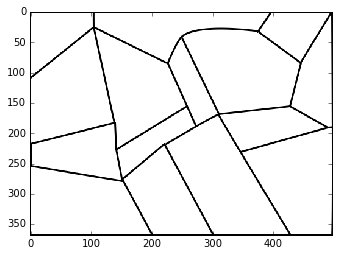

In [21]:
io.imshow(gb_figure);

This image can be used to mask the deformation maps. The first step is to create grain labels:

In [22]:
grain_labels=hrdic.get_grain_labels(omega,'../data/gbs.tiff')

These labels can now be used to pick grains. It's useful to be able to see the grain labels:

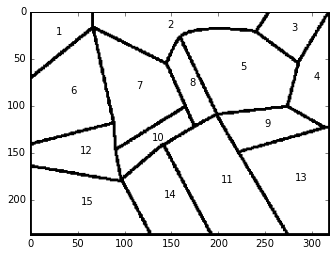

In [23]:
hrdic.show_grain_labels(grain_labels)

Now we can pick grains. For example, grain 5:

In [24]:
grain11=hrdic.get_grain(omega,grain_labels,11)

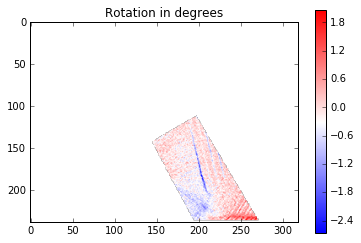

In [25]:
plt.imshow(grain11/np.pi*180,cmap='bwr')
plt.colorbar()
plt.title('Rotation in degrees');

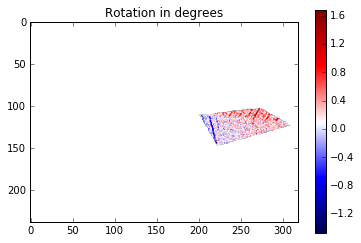

In [26]:
grain9=hrdic.get_grain(omega,grain_labels,9)
plt.imshow(grain9/np.pi*180,cmap='seismic')
plt.colorbar();
plt.title('Rotation in degrees');

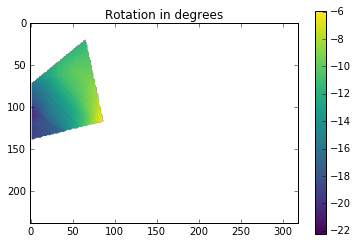

In [27]:
grain6x=hrdic.get_grain(def_map.x_map,grain_labels,6)
plt.imshow(grain6x,cmap='viridis')
plt.colorbar();
plt.title('Rotation in degrees');

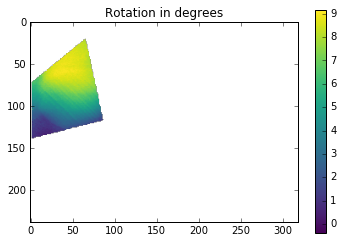

In [28]:
grain6y=hrdic.get_grain(def_map.y_map,grain_labels,6)
plt.imshow(grain6y,cmap='viridis')
plt.colorbar();
plt.title('Rotation in degrees');

In [29]:
def rotate_map(x_disp,y_disp,theta_deg):
    theta=theta_deg*np.pi/180
    x_prime=np.cos(theta)*x_disp-np.sin(theta)*y_disp
    y_prime=np.sin(theta)*x_disp+np.cos(theta)*y_disp
    return x_prime,y_prime

In [30]:
xd=def_map.x_map
yd=def_map.y_map
xd_prime,yd_prime=rotate_map(xd,yd,-45.0)

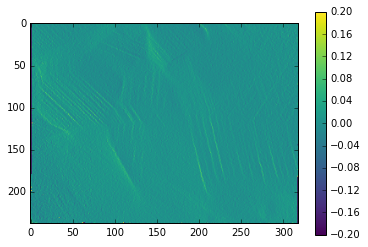

In [31]:
plt.imshow(np.diff(xd_prime,1)/8,cmap='viridis',vmin=-0.2,vmax=0.2)
plt.colorbar()

In [32]:
import timeit

In [41]:
timeit.time(rotate_map(grain6x,grain6y,-45.0))

TypeError: 'module' object is not callable

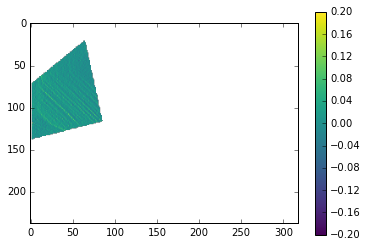

In [34]:
plt.imshow(np.diff(grain6x_prime,1)/8,cmap='viridis',vmin=-0.2,vmax=0.2)
plt.colorbar()

In [35]:
%matplotlib 

Using matplotlib backend: MacOSX


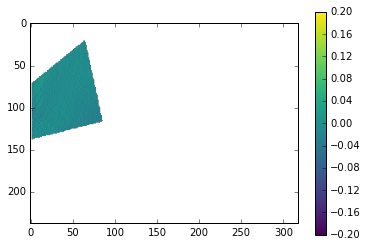

In [36]:
plt.imshow(np.diff(grain6y_prime,1)/8,cmap='viridis',vmin=-0.2,vmax=0.2)
plt.colorbar()